In [12]:
import numpy as np
import pandas as pd
from scipy.stats import norm, beta, gamma
import seaborn as sns

In [4]:
cov = np.array([[1,.4,.2],[.4,1,-.8],[.2,-.8,1]])
mean = np.array([0,0,0])
n = 2000
x = np.random.multivariate_normal(mean,cov,n)
z = norm.cdf(x, loc=0, scale =1)

In [24]:
w1 = beta.ppf(z[:,0], 1,1)
w2 = gamma.ppf(z[:,1], 2, 1)
w3 = beta.ppf(z[:,2], 2, 1)
w = np.array([w1, w2, w3]).T

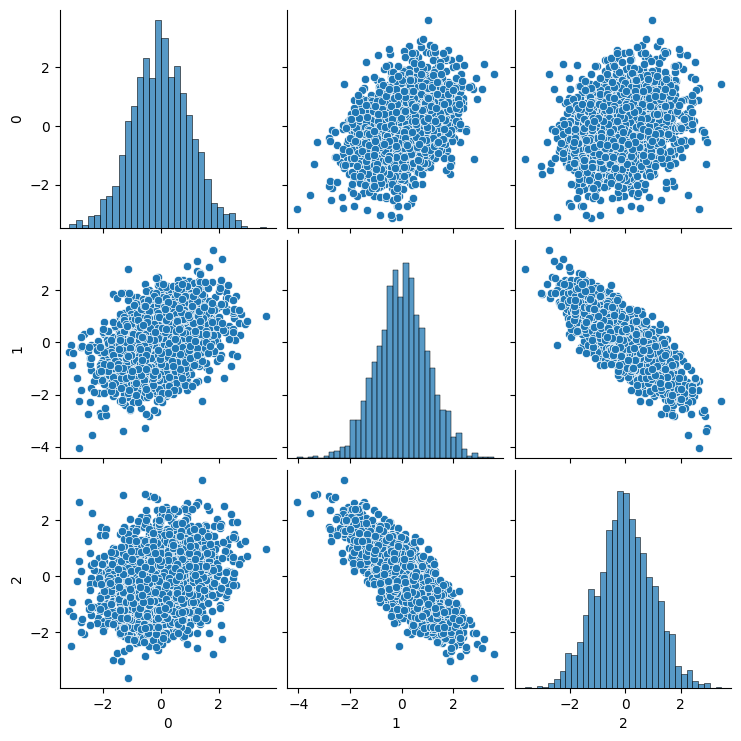

In [26]:
sns.pairplot(pd.DataFrame(x))

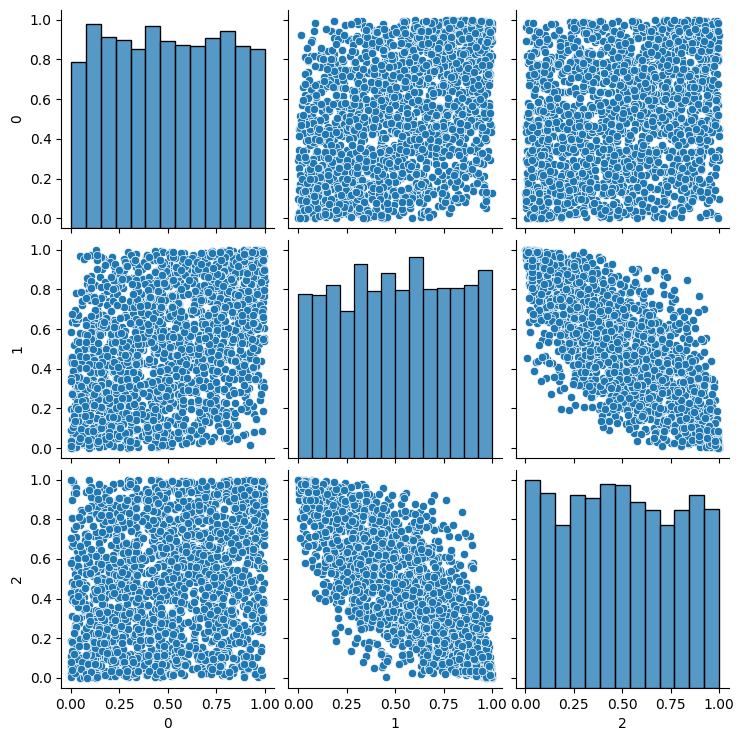

In [16]:
sns.pairplot(pd.DataFrame(z))

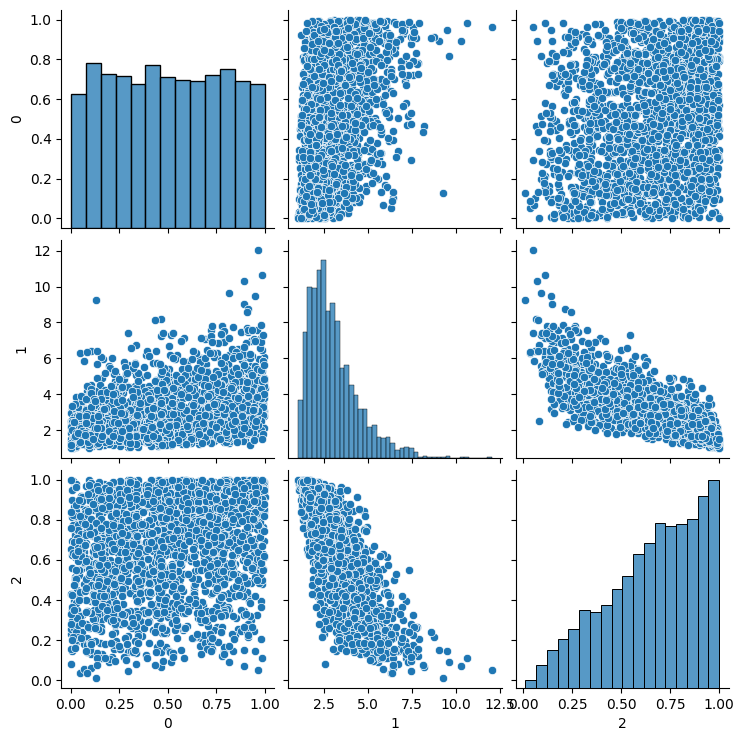

In [25]:
sns.pairplot(pd.DataFrame(w))